<a href="https://colab.research.google.com/github/Nandu-kannan/test/blob/main/xxa_nandu_dronedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!gdown --id 1ze6D6REFbDdyAXsxN5kwEqfh_OkC8qTo
!unzip RF_Data_raw.zip
!rm RF_Data_raw.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1ze6D6REFbDdyAXsxN5kwEqfh_OkC8qTo 

unzip:  cannot find or open RF_Data_raw.zip, RF_Data_raw.zip.zip or RF_Data_raw.zip.ZIP.
rm: cannot remove 'RF_Data_raw.zip': No such file or directory


In [2]:
!unzip RF_Data_raw.zip

unzip:  cannot find or open RF_Data_raw.zip, RF_Data_raw.zip.zip or RF_Data_raw.zip.ZIP.


In [3]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 52.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [4]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.figure
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [5]:
from tensorflow.keras.utils import to_categorical
def decode(datum):
    y = np.zeros((datum.shape[0],1))
    for i in range(datum.shape[0]):
        y[i] = np.argmax(datum[i])
    return y
def encode(datum):
    return to_categorical(datum)

In [13]:
cd /content/drive/MyDrive/Saurav

/content/drive/MyDrive/Saurav


In [14]:
print("Loading Data ...")
Data = np.loadtxt("RF_Data_raw.csv", delimiter=",")
Data.shape

Loading Data ...


(50003, 11350)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
from scipy.fft import fft
time_domain = []
freq_domain = []
Label_1 = []
Label_2 = []
Label_3 = []

for data in Data.T:
    for i in range(0,50000,5000):
        segment = data[i:i+5000]
        time_domain.append(segment)
        freq_domain.append(abs(fft(segment)))
        Label_1.append([data[50000]])
        Label_2.append([data[50001]])
        Label_3.append([data[50002]])

time_domain = np.array(time_domain)
freq_domain = np.array(freq_domain)

In [16]:
x_r = time_domain
x_f = freq_domain
Label_1 = np.array(Label_1);    Label_1 = Label_1.astype(int);
Label_2 = np.array(Label_2);    Label_2 = Label_2.astype(int);
Label_3 = np.array(Label_3);    Label_3 = Label_3.astype(int);
y1 = encode(Label_1)
y2 = encode(Label_2)
y3 = encode(Label_3)

In [17]:
del Data, time_domain, freq_domain

In [18]:
from sklearn.model_selection import train_test_split
x_train_f, x_test_f, x_train_r, x_test_r, y_train, y_test = train_test_split(x_f, x_r, y3, test_size=0.2, random_state=43, shuffle=True)
print(x_train_r.shape)
print(x_train_f.shape)
print(y_train.shape)
print(x_test_r.shape)
print(x_test_f.shape)
print(y_test.shape)

(90800, 5000)
(90800, 5000)
(90800, 10)
(22700, 5000)
(22700, 5000)
(22700, 10)


In [19]:
del Label_1, Label_2, Label_3, x_r, x_f

In [20]:
# reshape input to be [samples, time steps, features = 1] as the model requires this 3D shape imput
x_train_r = np.reshape(x_train_r, (x_train_r.shape[0], x_train_r.shape[1], 1))
x_test_r = np.reshape(x_test_r, (x_test_r.shape[0], x_test_r.shape[1], 1))
x_train_f = np.reshape(x_train_f, (x_train_f.shape[0], x_train_f.shape[1], 1))
x_test_f = np.reshape(x_test_f, (x_test_f.shape[0], x_test_f.shape[1], 1))
print(x_train_r.shape)
print(x_test_r.shape)
print(x_train_f.shape)
print(x_test_f.shape)

(90800, 5000, 1)
(22700, 5000, 1)
(90800, 5000, 1)
(22700, 5000, 1)


# MULTISCALE CNN TRAINING

## FOR TIME DOMAIN AND FREQ DOMAIN DATA

In [21]:
from tensorflow.keras import backend as Ke
from tensorflow.keras.layers import concatenate, Input, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.regularizers import l2
Ke.clear_session()
raw_input=Input(shape=(5000,1),name="rawInput")
x=Conv1D(32,7,padding='same', activation='relu',strides=2)(raw_input)
x=MaxPooling1D(pool_size=4,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(64,7,padding='same', activation='relu',strides=2)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(128,7,padding='same', activation='relu',strides=2)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

# x=Conv1D(256,7,padding='same', activation='relu',strides=1)(x)
# x=MaxPooling1D(pool_size=2,padding='same')(x)
# x=Dropout(rate = 0.25)(x)

x=Conv1D(256,7,padding='same', activation='relu',strides=1)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(512,7,padding='same', activation='relu',strides=1)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

# x=Conv1D(512,7,padding='same', activation='relu',strides=1)(x)
# x=MaxPooling1D(pool_size=2,padding='same')(x)
# x=Dropout(rate = 0.25)(x)

raw_output=GlobalMaxPooling1D()(x)
raw_model=keras.Model(raw_input, raw_output, name="rawModel")
raw_model.summary()

Model: "rawModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rawInput (InputLayer)       [(None, 5000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 2500, 32)          256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 625, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 625, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 313, 64)           14400     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 157, 64)          0         
 1D)                                                      

In [22]:
Ke.clear_session()
freq_input=Input(shape=(5000,1),name="freqInput")
x=Conv1D(32,7,padding='same', activation='relu',strides=2)(freq_input)
x=MaxPooling1D(pool_size=4,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(64,7,padding='same', activation='relu',strides=2)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(128,7,padding='same', activation='relu',strides=2)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(256,7,padding='same', activation='relu',strides=1)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

# x=Conv1D(256,7,padding='same', activation='relu',strides=1)(x)
# x=MaxPooling1D(pool_size=2,padding='same')(x)
# x=Dropout(rate = 0.25)(x)

# x=Conv1D(512,7,padding='same', activation='relu',strides=1)(x)
# x=MaxPooling1D(pool_size=2,padding='same')(x)
# x=Dropout(rate = 0.25)(x)

# x=Conv1D(512,7,padding='same', activation='relu',strides=1)(x)
# x=MaxPooling1D(pool_size=2,padding='same')(x)
# x=Dropout(rate = 0.25)(x)

freq_output=GlobalMaxPooling1D()(x)
freq_model=keras.Model(freq_input, freq_output, name="freqModel")
freq_model.summary()

Model: "freqModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 freqInput (InputLayer)      [(None, 5000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 2500, 32)          256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 625, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 625, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 313, 64)           14400     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 157, 64)          0         
 1D)                                                     

In [23]:
Ke.clear_session()
input_raw=Input(shape=(5000,1),name="raw")
raw=raw_model(input_raw)

input_freq=Input(shape=(5000,1),name="freq")
freq=freq_model(input_freq)


concat=concatenate([raw,freq])
hidden=Dropout(0.25)(concat)


hidden=Dense(128,activation='relu')(hidden)
hidden=Dropout(0.25)(hidden)

hidden=Dense(64,activation='relu')(hidden)
hidden=Dropout(0.25)(hidden)

hidden=Dense(32,activation='relu')(hidden)
hidden=Dropout(0.25)(hidden)

output=Dense(10,activation='softmax')(hidden)
net=tf.keras.Model([input_raw,input_freq], output, name="Net")

net.summary()

Model: "Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 raw (InputLayer)               [(None, 5000, 1)]    0           []                               
                                                                                                  
 freq (InputLayer)              [(None, 5000, 1)]    0           []                               
                                                                                                  
 rawModel (Functional)          (None, 512)          1219776     ['raw[0][0]']                    
                                                                                                  
 freqModel (Functional)         (None, 256)          301760      ['freq[0][0]']                   
                                                                                                

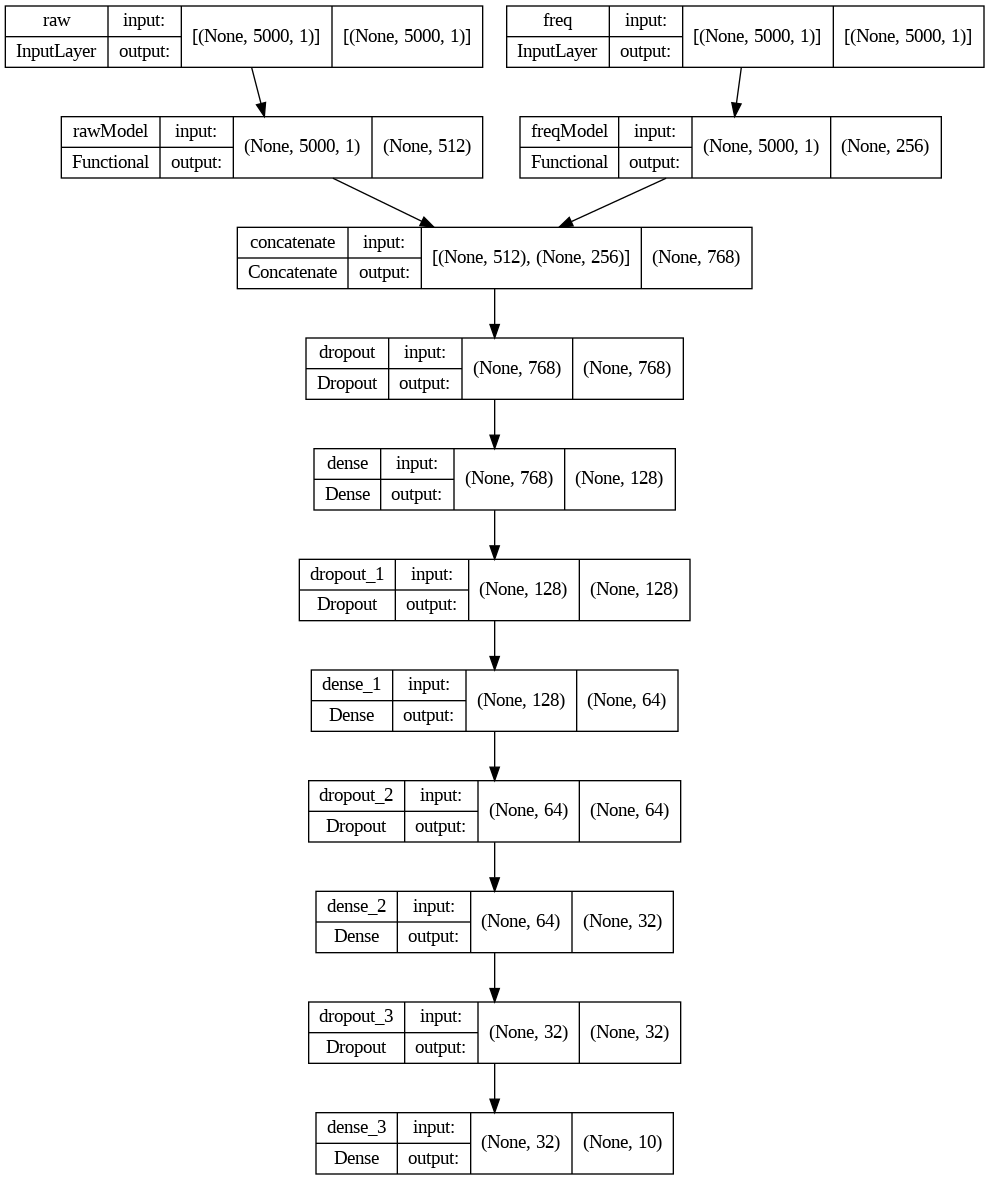

In [24]:
#keras.utils.plot_model(net, "net.png", show_shapes=True)
from tensorflow.keras.utils import plot_model
plot_model(net, "net.png", show_shapes=True)

In [27]:
def run_model():
    # learning_rate = 0.01 # initial learning rate
    # decay_rate = 0.1
    # opt=keras.optimizers.Adam(learning_rate=learning_rate)
    # def exp_decay(epoch):
    #     lrate = learning_rate * np.exp(-decay_rate*epoch)
    #     return lrate

    # # learning schedule callback
    # loss_history = tf.keras.callbacks.History()
    # lr_rate = tf.keras.callbacks.LearningRateScheduler(exp_decay)

    # estp = EarlyStopping(monitor='val_loss', min_delta=0.0005,patience=8 , verbose=1, mode='auto',restore_best_weights=True)
    # callbacks_list = [loss_history, lr_rate]

    opt=keras.optimizers.Adam(learning_rate=0.00001)
    net.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    estp = EarlyStopping(monitor='val_loss', min_delta=0.0005,patience=8 , verbose=1, mode='auto',restore_best_weights=True) #, callbacks = [estp]

    history = net.fit(
        {"raw":x_train_r,"freq":x_train_f},
        y_train,
        batch_size=128,
        epochs=300,
        verbose = 1,
        validation_split=0.2,
        callbacks = [estp])

    history_dict = history.history
    history_dict.keys()
    results = net.evaluate({"raw":x_test_r,"freq":x_test_f}, y_test)

In [ ]:
#good hyper parameters


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the optimizer with adjusted learning rate
opt = Adam(learning_rate=0.001)

# Compile the model with adjusted hyperparameters
net.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define early stopping with adjusted parameters
estp = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=8, verbose=1, mode='auto', restore_best_weights=True)

# Fit the model with updated hyperparameters
history = net.fit(
    {"raw": x_train_r, "freq": x_train_f},
    y_train,
    batch_size=64,  # Adjusted batch size
    epochs=500,  # Increased number of epochs
    verbose=1,
    validation_split=0.2,
    callbacks=[estp]
)

# Evaluate the model on the test set
results = net.evaluate({"raw": x_test_r, "freq": x_test_f}, y_test)


Epoch 1/500
1135/1135 [==============================] - 286s 251ms/step - loss: 1.2555 - accuracy: 0.4885 - val_loss: 0.5741 - val_accuracy: 0.7828
Epoch 2/500
1135/1135 [==============================] - 272s 239ms/step - loss: 0.6361 - accuracy: 0.7295 - val_loss: 0.4361 - val_accuracy: 0.8020
Epoch 3/500
1135/1135 [==============================] - 269s 237ms/step - loss: 0.5033 - accuracy: 0.7746 - val_loss: 0.3812 - val_accuracy: 0.8215
Epoch 4/500
1135/1135 [==============================] - 267s 235ms/step - loss: 0.4582 - accuracy: 0.7941 - val_loss: 0.3561 - val_accuracy: 0.8406
Epoch 5/500
1135/1135 [==============================] - 272s 239ms/step - loss: 0.4189 - accuracy: 0.8106 - val_loss: 0.3395 - val_accuracy: 0.8322
Epoch 6/500
1135/1135 [==============================] - 269s 237ms/step - loss: 0.3942 - accuracy: 0.8210 - val_loss: 0.3060 - val_accuracy: 0.8517


In [26]:
run_model()

Epoch 1/300
173/568 [========>.....................] - ETA: 3:08 - loss: 2.3402 - accuracy: 0.0974

KeyboardInterrupt: ignored

In [ ]:
del x, raw_model, raw_input, raw_output, raw, output, input_freq, input_raw, net

In [ ]:
del concat, data, freq, freq_input, freq_model, freq_output, hidden, i

In [ ]:
# results = model.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Accuracy on test set: [1.8777713775634766, 0.5373568534851074]
Test loss: 1.8777713775634766
Test accuracy: 0.5373568534851074


In [ ]:
net2 = tf.keras.models.load_model("/content/drive/MyDrive/Sayantika/model_4_class")

In [ ]:
accuracy = np.loadtxt("/content/drive/MyDrive/Sayantika/model_4_class/4C_train_acc.txt")
val_accuracy = np.loadtxt("/content/drive/MyDrive/Sayantika/model_4_class/4C_val_acc.txt")
loss = np.loadtxt("/content/drive/MyDrive/Sayantika/model_4_class/4C_train_loss.txt")
val_loss = np.loadtxt("/content/drive/MyDrive/Sayantika/model_4_class/4C_val_loss.txt")

In [ ]:
#PLOT TRAINING CURVES
# val_loss = history.history['val_loss']
# loss = history.history['loss']
# accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# plt.rcParams['figure.figsize'] = [ 10,8]
plt.rcParams['figure.figsize'] = [10, 5]
ax=plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss', color='red')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.plot(epochs,val_loss , 'b', label='Validation loss', color='green')
plt.title('Training and validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()

ax=plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training acc', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc', color='green')
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
plt.title('Training and validation accuracy', fontsize=15)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# save the plot varriables
train_loss=history.history['loss']; filepath_tloss='/content/drive/MyDrive/Sayantika/model_10_class_8744/train_loss.txt'; np.savetxt(filepath_tloss,train_loss)
val_loss=history.history['val_loss']; filepath_vloss='/content/drive/MyDrive/Sayantika/model_10_class_8744/val_loss.txt'; np.savetxt(filepath_vloss,val_loss)
acc=history.history['accuracy'];      filepath_tacc='/content/drive/MyDrive/Sayantika/model_10_class_8744/train_acc.txt'; np.savetxt(filepath_tacc,acc)
val_acc=history.history['val_accuracy']; filepath_vacc='/content/drive/MyDrive/Sayantika/model_10_class_8744/val_acc.txt'; np.savetxt(filepath_vacc,val_acc)

In [ ]:
net.save('/content/drive/MyDrive/Sayantika/model_10_class_8744') #save model

In [ ]:
# prediction using CNN
predicted=net2.predict({"raw":x_test_r,"freq":x_test_f})
Y_pred=predicted.argmax(axis=-1)

Y_true = decode(y_test)
Y_true.shape

In [ ]:
q=np.array(Y_pred) #2-class
label_l=[]
for i in range (q.shape[0]):
  if q[i]==0:
    label_l.append('No Drone')
  elif q[i]==1:
    label_l.append('Drone')

Label_ar=np.array(label_l)

In [ ]:
q=np.array(Y_pred) #4-class
label_l=[]
for i in range (q.shape[0]):
  if q[i]==0:
    label_l.append('No Drone')
  elif q[i]==1:
    label_l.append('Bebop')
  elif q[i]==2:
    label_l.append('AR')
  elif q[i]==3:
    label_l.append('Phantom')

Label_ar=np.array(label_l)

In [ ]:
q=np.array(Y_pred) #10-class ','Bebop m2', 'Bebop m3', 'Bebop m4', 'AR m1', 'AR m2', 'AR m3', 'AR m4', 'Phantom m1
label_l=[]
for i in range (q.shape[0]):
  if q[i]==0:
    label_l.append('No Drone')
  elif q[i]==1:
    label_l.append('Bebop m1')
  elif q[i]==2:
    label_l.append('Bebop m2')
  elif q[i]==3:
    label_l.append('Bebop m3')
  elif q[i]==4:
    label_l.append('Bebop m4')
  elif q[i]==5:
    label_l.append('AR m1')
  elif q[i]==6:
    label_l.append('AR m2')
  elif q[i]==7:
    label_l.append('AR m3')
  elif q[i]==8:
    label_l.append('AR m4')
  elif q[i]==9:
    label_l.append('Phantom m1')

Label_ar=np.array(label_l)

In [ ]:
#TSNE PLOTS
import seaborn as sns
from sklearn.manifold import TSNE
# out_dense= keras.Model(inputs=model.input,outputs=model.get_layer('dense_5').output)
# Y_denseout = out_dense.predict(x_test) #predicted Y

tsne = TSNE(n_components=2,learning_rate='auto',init='random')
Y_embedded = tsne.fit_transform(predicted)
plt.figure(figsize=(10,8))
sns.scatterplot(Y_embedded[:,0], Y_embedded[:,1], hue=Label_ar)
plt.xlabel("Dimension 1",fontweight ='bold', fontsize = 15);
plt.ylabel("Dimenssion 2",fontweight ='bold', fontsize = 15)
plt.title('t-SNE plot After applying Lightweight CNN',fontweight ='bold', fontsize = 15)

In [ ]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(Y_true,Y_pred)
cm_norm3=confusion_matrix(Y_true,Y_pred,normalize='true')
print(cm3)  #10 class
cm_norm3 = cm_norm3*100
cm_norm3=np.round_(cm_norm3,decimals=2)
print(cm_norm3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_true,Y_pred)
cm_norm=confusion_matrix(Y_true,Y_pred,normalize='true')
print(cm)  #4 class

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_true,Y_pred)
cm_norm1=confusion_matrix(Y_true,Y_pred,normalize='true')
print(cm1)
print(cm_norm1) #2 class

In [ ]:
cm_norm #4 class

In [ ]:
cm_norm2 = np.array([[0.9975,0.0025,0,0],[0,0.9771,0.018,0.0049],[0,0.0024,0.9896,0.0084],[0,0,0.015,0.985]])
cm_norm2 = cm_norm2*100
cm_norm2

In [ ]:
cm_norm1 = np.array([[0.9952,0.0048],[0.0011,0.9989]])
cm_norm1= cm_norm1*100
cm_norm1

In [ ]:
cm_norm3 = np.array([[0.99,0,0,0,0,0,0,0.0024,0.0072,0],
                    [0,0.54,0.29,0.0045,0,0.12,0,0.0045,0.036,0.0045],
                    [0,0.34,0.55,0.02,0,0.087,0.0051,0,0,0],
                    [0,0.067,0.12,0.75,0.9,0.015,0,0.0049,0.039,0.0049],
                    [0,0,0.024,0.015,0.9,0.015,0,0.0049,0.039,0.0049],
                    [0,0.0047,0.0047,0,0,0.99,0,0.0047,0,0],
                    [0,0,0,0,0,0.036,0.92,0.009,0.027,0.0045],
                    [0,0.0047,0,0,0,0.0047,0.0093,0.89,0.088,0],
                    [0,0,0,0,0,0.011,0.038,0.46,0.49,0],
                    [0.0049,0,0,0,0,0,0.015,0,0.0049,0.98]])
cm_norm3= cm_norm3*100
cm_norm3 = np.round_(cm_norm3, decimals = 2 )
cm_norm3

In [ ]:
filepath_cm='/content/drive/MyDrive/Sayantika/cm_10class_86.txt';
np.savetxt(filepath_cm,cm3)

In [ ]:
#MULTICLASS CLASSIFICATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_true, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_true, Y_pred, average=None)
avg_precision = precision_score(Y_true, Y_pred, average='macro')
print('Precision:')
print(precision)
print(avg_precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_true, Y_pred, average=None)
avg_recall = recall_score(Y_true, Y_pred, average='macro')
print('Recall:')
print(recall)
print(avg_recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_true, Y_pred, average=None)
avg_f1 = f1_score(Y_true, Y_pred, average='macro')
print('F1 score:')
print(f1)
print(avg_f1)


In [ ]:
#BINARY CLASSIFICATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_true, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_true, Y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_true, Y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_true, Y_pred)
print('F1 score: %f' % f1)


In [ ]:
import pandas as pd
import seaborn as sns

plt.figure(figsize=(35,10))
# plt.figure(figsize=(10,10))

sns.set(font_scale=1.3)

cm_df_norm1 = pd.DataFrame(cm_norm1,
                     index = ['No Drone','Drone'],
                     columns = ['No Drone','Drone'])
plt.subplot(131)
sns.heatmap(cm_df_norm1,annot=True, fmt='g', cbar = False)
plt.title('Normalised Confusion Matrix (%)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

cm_df_norm2 = pd.DataFrame(cm_norm2,
                     index = ['No Drone','Bebop', 'AR', 'Phantom'],
                     columns = ['No Drone','Bebop', 'AR', 'Phantom'])
plt.subplot(132)
sns.heatmap(cm_df_norm2,annot=True, fmt='g', cbar = False)
plt.title('Normalised Confusion Matrix (%)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

cm_df_norm3 = pd.DataFrame(cm_norm3,
                     index = ['No Drone','Bebop m1','Bebop m2', 'Bebop m3', 'Bebop m4', 'AR m1', 'AR m2', 'AR m3', 'AR m4', 'Phantom m1'],
                     columns = ['No Drone','Bebop m1','Bebop m2', 'Bebop m3', 'Bebop m4', 'AR m1', 'AR m2', 'AR m3', 'AR m4', 'Phantom m1'])
plt.subplot(133)
sns.heatmap(cm_df_norm3,annot=True, fmt = "g", cbar = False)
plt.title('Normalised Confusion Matrix (%)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

# plt.subplots_adjust(left=0.1,
#                     # bottom=0.1,
#                     # right=0.9
#                     # top=0.9,
#                     wspace=0.3)
#                     # hspace=0.4)
plt.show()

# print(cm)

In [ ]:
plt.figure(figsize=(30,10))
cm_df_norm3 = pd.DataFrame(cm_norm3,
                     index = ['No Drone','Bebop m1','Bebop m2', 'Bebop m3', 'Bebop m4', 'AR m1', 'AR m2', 'AR m3', 'AR m4', 'Phantom m1'],
                     columns = ['No Drone','Bebop m1','Bebop m2', 'Bebop m3', 'Bebop m4', 'AR m1', 'AR m2', 'AR m3', 'AR m4', 'Phantom m1'])
sns.heatmap(cm_df_norm3,annot=True, fmt='g', cbar = False)
plt.title('Normalised Confusion Matrix (%)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()